# Analysis: Linear Store Price

Goal: Use linear regression to create a model for store price.

In [1]:
import pandas as PD
import numpy as NP
import sklearn.preprocessing as PP
import sklearn.model_selection as MS
import sklearn.linear_model as LM

import matplotlib.pyplot as MP
import seaborn as SB
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2         # reload custom py file eveytime a new cell is run

#import helper 

## Prepare Target & Features

In [4]:
FULL_FILE = 'data/brickset_features.csv'
full_df = PD.read_csv(FULL_FILE)
full_df.head()
full_df.info()

,set_no,name,price_store,price_used,popularity,group,year,total_parts,number_parts,number_colors,scolor_1st,scolor_2nd
0,1591-1,Danone Delivery Truck,NaN,28.0,NaN,Modern day,1980.0,40,19,4,White,Blue
1,1592-1,Town Square - Castle Scene,NaN,235.0,19.2,Modern day,1980.0,495,133,10,Black,Yellow
2,1651-2,Maersk Line Container Lorry,NaN,444.0,5.0,Modern day,1980.0,305,66,9,Blue,Gray
3,6305-1,Trees and Flowers,3.75,10.0,17.2,Modern day,1980.0,24,6,4,Green,Red
4,6306-1,Road Signs,2.50,13.0,12.0,Modern day,1980.0,12,10,1,White,White


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 12 columns):
set_no           3213 non-null object
name             3213 non-null object
price_store      2762 non-null float64
price_used       3140 non-null float64
popularity       3001 non-null float64
group            3213 non-null object
year             3213 non-null float64
total_parts      3213 non-null int64
number_parts     3213 non-null int64
number_colors    3213 non-null int64
scolor_1st       3213 non-null object
scolor_2nd       3213 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 301.3+ KB


In [5]:
# filter out rows without store price

full_df = full_df.loc[full_df['price_store'].isna()==False]
full_df.shape

(2762, 12)

In [6]:
# target series

target_sr = full_df['price_store']
target_sr.shape

(2762,)

In [7]:
# feature dataframe with one-hot encoding

feature_ls = ['group', 'year', 'total_parts', 'number_parts', 'number_colors', 'scolor_1st', 'scolor_2nd']
feature_cat_df = full_df[feature_ls]

feature_df = PD.get_dummies(feature_cat_df, drop_first= True, 
               columns=['group', 'scolor_1st', 'scolor_2nd'])
feature_df.shape
feature_df.columns

(2762, 27)

Index(['year', 'total_parts', 'number_parts', 'number_colors',
       'group_Historical', 'group_Licensed', 'group_Model making',
       'group_Modern day', 'group_Racing', 'scolor_1st_Blue',
       'scolor_1st_Brown', 'scolor_1st_Gray', 'scolor_1st_Green',
       'scolor_1st_Red', 'scolor_1st_Tan', 'scolor_1st_Transparent',
       'scolor_1st_White', 'scolor_1st_Yellow', 'scolor_2nd_Blue',
       'scolor_2nd_Brown', 'scolor_2nd_Gray', 'scolor_2nd_Green',
       'scolor_2nd_Red', 'scolor_2nd_Tan', 'scolor_2nd_Transparent',
       'scolor_2nd_White', 'scolor_2nd_Yellow'],
      dtype='object')

## Split Out Test

In [8]:
TEST_SPLIT = 0.2
SEED = 1

In [9]:
# not able to stratify the subsets 

stratify_sr = target_sr.value_counts()
stratify_sr = stratify_sr[stratify_sr > 1]
stratify_sr.head()
stratify_sr.shape

19.99    210
29.99    165
9.99     145
39.99    142
49.99    140
Name: price_store, dtype: int64

(129,)

In [10]:
X_train, X_test, y_train, y_test = MS.train_test_split(target_sr, feature_df, test_size=TEST_SPLIT, 
                                                       random_state=SEED)
X_train.shape
X_test.shape
y_train.shape
y_test.shape 

(2209,)

(553,)

(2209, 27)

(553, 27)

In [11]:
# standardize numeric columns of the training set
# doesn't work to do all columns at once

numeric_ls = ['total_parts', 'number_parts', 'number_colors']
scaler = PP.StandardScaler()
trans = scaler.fit_transform( NP.array(y_train[numeric_ls]).reshape(-1, 1) )
trans.shape

(6627, 1)

In [12]:
# standardize each column

y_train['year_std'] = scaler.fit_transform( NP.array(y_train['year']).reshape(-1, 1) )
y_train['total_parts_std'] = scaler.fit_transform( NP.array(y_train['total_parts']).reshape(-1, 1) )
y_train['number_parts_std'] = scaler.fit_transform( NP.array(y_train['number_parts']).reshape(-1, 1) )
y_train['number_colors_std'] = scaler.fit_transform( NP.array(y_train['number_colors']).reshape(-1, 1) )

y_train.columns

/Users/philbert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/philbert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/philbert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Index(['year', 'total_parts', 'number_parts', 'number_colors',
       'group_Historical', 'group_Licensed', 'group_Model making',
       'group_Modern day', 'group_Racing', 'scolor_1st_Blue',
       'scolor_1st_Brown', 'scolor_1st_Gray', 'scolor_1st_Green',
       'scolor_1st_Red', 'scolor_1st_Tan', 'scolor_1st_Transparent',
       'scolor_1st_White', 'scolor_1st_Yellow', 'scolor_2nd_Blue',
       'scolor_2nd_Brown', 'scolor_2nd_Gray', 'scolor_2nd_Green',
       'scolor_2nd_Red', 'scolor_2nd_Tan', 'scolor_2nd_Transparent',
       'scolor_2nd_White', 'scolor_2nd_Yellow', 'year_std', 'total_parts_std',
       'number_parts_std', 'number_colors_std'],
      dtype='object')

In [13]:
# remove the non-standard columns

y_train.drop(columns=['year', 'total_parts', 'number_parts', 'number_colors'])
y_train.columns

,group_Historical,group_Licensed,group_Model making,group_Modern day,group_Racing,scolor_1st_Blue,scolor_1st_Brown,scolor_1st_Gray,scolor_1st_Green,scolor_1st_Red,...,scolor_2nd_Green,scolor_2nd_Red,scolor_2nd_Tan,scolor_2nd_Transparent,scolor_2nd_White,scolor_2nd_Yellow,year_std,total_parts_std,number_parts_std,number_colors_std
1195,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.517117,-0.600559,-0.744911,-0.092249
2367,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.797808,-0.033469,-0.836711,-1.293599
3149,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.275962,0.449607,0.643577,1.409437
2299,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.678269,-0.564854,-0.710485,1.109100
1352,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.397578,-0.060774,-0.067879,0.208088
2177,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.558731,-0.308613,-0.446558,0.057919
949,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.875732,-0.613161,-0.744911,-0.692924
961,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,-0.875732,0.092551,0.161623,-0.392587
3022,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.156424,-0.558553,-0.561309,0.358257
763,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.995271,-0.352720,-0.067879,-0.542755


Index(['year', 'total_parts', 'number_parts', 'number_colors',
       'group_Historical', 'group_Licensed', 'group_Model making',
       'group_Modern day', 'group_Racing', 'scolor_1st_Blue',
       'scolor_1st_Brown', 'scolor_1st_Gray', 'scolor_1st_Green',
       'scolor_1st_Red', 'scolor_1st_Tan', 'scolor_1st_Transparent',
       'scolor_1st_White', 'scolor_1st_Yellow', 'scolor_2nd_Blue',
       'scolor_2nd_Brown', 'scolor_2nd_Gray', 'scolor_2nd_Green',
       'scolor_2nd_Red', 'scolor_2nd_Tan', 'scolor_2nd_Transparent',
       'scolor_2nd_White', 'scolor_2nd_Yellow', 'year_std', 'total_parts_std',
       'number_parts_std', 'number_colors_std'],
      dtype='object')

[Text(0, 0.5, 'Number of Sets'), Text(0.5, 0, 'Total Parts')]

[Text(0, 0.5, 'Number of Sets'), Text(0.5, 0, 'Normalized Total Parts')]

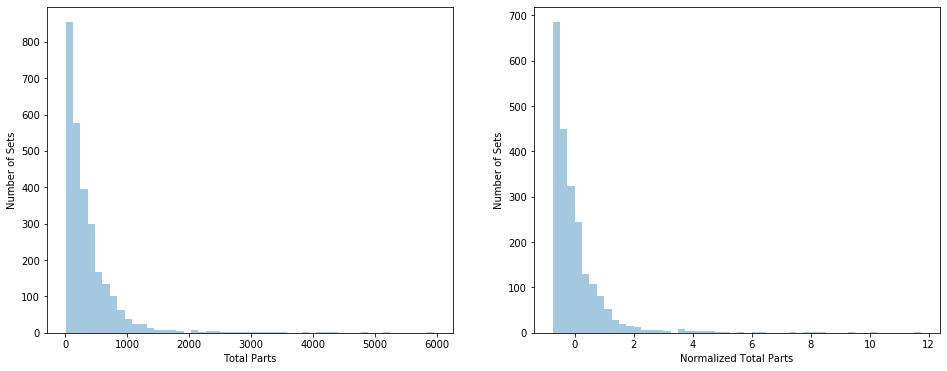

In [15]:
fig, axs = MP.subplots(1, 2, figsize=(16, 6))

SB.distplot(feature_df['total_parts'], ax=axs[0], kde=False)
axs[0].set(xlabel='Total Parts', ylabel='Number of Sets')

SB.distplot(y_train['total_parts_std'], ax=axs[1], kde=False)
axs[1].set(xlabel='Normalized Total Parts', ylabel='Number of Sets')

MP.show()

## Commence Model